# Homework 3 - SVM 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

C:\Users\neham\AppData\Local\Temp\ipykernel_65068\3420695780.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Programming Question 3

### (a) Data Preprocessing

In [2]:
# get train data from provided csv file and drop the first column (index)
train_data = pd.read_csv('data_train-2.csv')
train_data = train_data.drop(train_data.columns[0], axis=1)
train_data.head()
train_data.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
#adding the label column to the data, label column is 1 if Chance of Admit is greater than median, 0 otherwise

chanceofadmit_median = train_data['Chance of Admit '].median()
print("Median of Chance of Admit: ", chanceofadmit_median)
train_data['Label'] = (train_data['Chance of Admit '] > chanceofadmit_median).astype(int)
print(train_data.head())


Median of Chance of Admit:  0.72
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         109        331          116                  5  5.0   5.0  9.38   
1         346        316           98                  1  1.5   2.0  7.43   
2          99        332          119                  4  5.0   4.5  9.24   
3         210        301          104                  3  3.5   4.0  8.12   
4         242        317          103                  2  2.5   2.0  8.15   

   Research  Chance of Admit   Label  
0         1              0.93      1  
1         0              0.49      0  
2         1              0.90      1  
3         1              0.68      0  
4         0              0.65      0  


In [73]:
#spliting to train and validation 
X = train_data.drop(['Label'], axis=1)
y = train_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### (b) Model Initialization

#### 1. Linear kernel

In [74]:
svm_linear = SVC(kernel='linear')

#### 2. RBF kernel

In [75]:
svm_rbf = SVC(kernel='rbf')

#### 3. Polynomial (degree 3) kernel

In [76]:
svm_poly = SVC(kernel='poly', degree=3)

### c. Feature Selection and Model Training

In this step, we make the model learn with the train data (80% of the total training data). 

The .fit() method learns the model weights. 

This is done for 12 different models. 3 different types of models with 4 different feature combinations. 
Below is the depiction of .fit() and model intialization of the remaining models. (The first model intialized (in the previous step) will be used for the linear SVM with feature combination of CGPA and SOP)

#### 1. CGPA and SOP

In [77]:
X1 = X_train[['CGPA', 'SOP']]

svm_linear.fit(X1, y_train)
svm_rbf.fit(X1, y_train)
svm_poly.fit(X1, y_train)



SVC(kernel='poly')

#### 2. CGPA and GRE Score

In [78]:
svm_linear_2 = SVC(kernel='linear')
svm_rbf_2 = SVC(kernel='rbf')
svm_poly_2 = SVC(kernel='poly', degree=3)

X2 = X_train[['CGPA', 'GRE Score']]

svm_linear_2.fit(X2, y_train)
svm_rbf_2.fit(X2, y_train)
svm_poly_2.fit(X2, y_train)

SVC(kernel='poly')

#### 3. SOP and LOR

In [79]:
svm_linear_3 = SVC(kernel='linear')
svm_rbf_3 = SVC(kernel='rbf')
svm_poly_3 = SVC(kernel='poly', degree=3)

X3 = X_train[['SOP', 'LOR ']]


svm_linear_3.fit(X3, y_train)
svm_rbf_3.fit(X3, y_train)
svm_poly_3.fit(X3, y_train)

SVC(kernel='poly')

#### 4. LOR and GRE Score

In [80]:
svm_linear_4 = SVC(kernel='linear')
svm_rbf_4 = SVC(kernel='rbf')
svm_poly_4 = SVC(kernel='poly', degree=3)

X4 = X_train[['LOR ', 'GRE Score']]

svm_linear_4.fit(X4, y_train)
svm_rbf_4.fit(X4, y_train)
svm_poly_4.fit(X4, y_train)

SVC(kernel='poly')

### (d) Support Vectors

This part is used to calculate the support vectors for each of the model. 
The data points for the support vector are obtained by the built in function .support_vectors_ and support vector counts for each class is obtained by .n_support_ method. 

In [81]:
def get_support_vectors(model):
    
    support_vectors = model.support_vectors_
    print("Support vectors: ")
    print(support_vectors)

    #support vector count for each class 
    support_vectors_count = model.n_support_
    print("Support vector count for each class:", support_vectors_count)
    print("for class 0 = ", support_vectors_count[0])
    print("for class 1 = ", support_vectors_count[1])

In [82]:
print("Support vector for linear kernel SVM models with features CGPA and SOP")
get_support_vectors(svm_linear)


Support vector for linear kernel SVM models with features CGPA and SOP
Support vectors: 
[[8.57 3.  ]
 [8.73 3.  ]
 [8.54 2.5 ]
 [8.53 3.5 ]
 [8.6  3.5 ]
 [8.28 3.5 ]
 [8.8  4.  ]
 [8.22 3.5 ]
 [8.67 4.  ]
 [8.2  4.  ]
 [8.54 3.5 ]
 [8.45 3.  ]
 [8.56 3.5 ]
 [8.53 3.5 ]
 [8.4  4.  ]
 [8.2  3.5 ]
 [8.54 3.  ]
 [8.5  3.5 ]
 [8.76 2.5 ]
 [8.45 3.5 ]
 [8.34 3.5 ]
 [8.45 3.5 ]
 [8.25 4.  ]
 [8.56 4.  ]
 [8.69 4.  ]
 [8.4  3.  ]
 [8.56 2.5 ]
 [8.1  4.  ]
 [8.64 3.5 ]
 [8.3  3.5 ]
 [8.46 3.5 ]
 [8.84 3.  ]
 [8.48 3.  ]
 [8.5  3.  ]
 [9.02 3.  ]
 [8.6  3.5 ]
 [8.4  3.5 ]
 [8.79 2.5 ]
 [8.76 3.5 ]
 [8.5  4.  ]
 [8.66 2.  ]
 [8.65 2.  ]
 [8.9  3.  ]
 [8.12 3.  ]
 [8.26 3.  ]
 [8.97 3.  ]
 [8.48 2.  ]
 [8.72 3.  ]
 [8.65 4.5 ]
 [8.67 3.  ]
 [8.83 3.5 ]
 [8.76 3.  ]
 [8.9  3.5 ]
 [8.4  3.  ]
 [8.67 3.5 ]
 [9.11 3.  ]
 [8.45 5.  ]
 [8.8  2.5 ]
 [8.87 3.5 ]
 [8.79 4.  ]
 [8.8  4.  ]
 [8.44 3.5 ]
 [8.3  4.  ]
 [8.33 3.5 ]
 [8.57 3.  ]
 [8.46 3.  ]
 [8.44 4.  ]
 [8.17 3.  ]
 [8.74 3.  ]
 [8.52 3.  ]
 

In [83]:
print("Support vector for linear kernel SVM models with features CGPA and GRE Score")
get_support_vectors(svm_linear_2)

Support vector for linear kernel SVM models with features CGPA and GRE Score
Support vectors: 
[[  8.57 317.  ]
 [  8.73 304.  ]
 [  8.54 318.  ]
 [  8.53 312.  ]
 [  8.6  308.  ]
 [  8.28 317.  ]
 [  8.43 313.  ]
 [  8.32 316.  ]
 [  8.8  318.  ]
 [  8.67 318.  ]
 [  8.32 316.  ]
 [  8.45 308.  ]
 [  8.56 309.  ]
 [  8.53 312.  ]
 [  8.54 319.  ]
 [  8.76 319.  ]
 [  8.45 311.  ]
 [  8.25 314.  ]
 [  8.56 320.  ]
 [  8.69 313.  ]
 [  8.4  325.  ]
 [  8.56 314.  ]
 [  8.1  324.  ]
 [  8.64 316.  ]
 [  8.3  314.  ]
 [  8.46 322.  ]
 [  8.84 327.  ]
 [  8.48 305.  ]
 [  8.2  316.  ]
 [  8.5  318.  ]
 [  9.02 327.  ]
 [  8.6  323.  ]
 [  8.4  325.  ]
 [  8.79 324.  ]
 [  8.76 324.  ]
 [  8.5  315.  ]
 [  8.45 312.  ]
 [  8.34 315.  ]
 [  8.66 300.  ]
 [  8.65 318.  ]
 [  8.43 311.  ]
 [  8.9  314.  ]
 [  8.12 311.  ]
 [  8.26 306.  ]
 [  8.48 315.  ]
 [  8.65 312.  ]
 [  8.67 319.  ]
 [  8.83 321.  ]
 [  9.   313.  ]
 [  8.8  322.  ]
 [  8.9  313.  ]
 [  8.4  327.  ]
 [  8.67 310.  ]
 [  

In [84]:
print("Support vector for linear kernel SVM models with features SOP and LOR")
get_support_vectors(svm_linear_3)

Support vector for linear kernel SVM models with features SOP and LOR
Support vectors: 
[[5.  3.5]
 [3.  4. ]
 [3.5 3. ]
 [4.  3. ]
 [3.5 3. ]
 [3.5 3. ]
 [2.5 4. ]
 [2.5 4. ]
 [4.  3. ]
 [3.5 3.5]
 [3.5 4. ]
 [4.  3.5]
 [2.  4. ]
 [4.  3. ]
 [4.  2. ]
 [3.5 4. ]
 [3.  4. ]
 [3.5 3.5]
 [3.5 3. ]
 [3.5 3. ]
 [4.  4. ]
 [2.5 3.5]
 [3.5 4. ]
 [3.  3.5]
 [3.5 3. ]
 [4.  3.5]
 [3.5 4. ]
 [3.5 3.5]
 [3.5 4. ]
 [3.5 3. ]
 [3.  3.5]
 [4.  3.5]
 [3.  3.5]
 [4.  3.5]
 [4.  4.5]
 [2.5 4. ]
 [4.  2.5]
 [3.  4. ]
 [3.  3. ]
 [3.5 3.5]
 [3.5 2.5]
 [3.  3. ]
 [3.5 3.5]
 [2.5 3.5]
 [3.  3.5]
 [3.5 3. ]
 [3.  3. ]
 [3.  3. ]
 [3.  3. ]
 [3.5 3. ]
 [4.  4. ]
 [3.5 4. ]
 [3.5 3. ]
 [4.  3. ]
 [3.  3. ]
 [4.  3. ]
 [3.5 3. ]
 [4.  3. ]
 [4.  3.5]
 [3.5 4.5]
 [3.  5. ]
 [3.  2. ]
 [3.  2.5]
 [3.  3.5]
 [2.  2.5]
 [4.  4. ]
 [3.  3. ]
 [3.  3.5]
 [3.5 4. ]
 [4.  3.5]
 [3.  2.5]
 [3.5 3.5]
 [4.5 3. ]
 [3.5 4. ]
 [3.  4. ]
 [3.5 3. ]
 [4.5 3. ]
 [3.5 3.5]
 [4.  3.5]
 [3.  3. ]
 [2.5 2. ]
 [3.5 4. ]
 [3.5 3.5]

In [85]:
print("Support vector for linear kernel SVM models with features LOR and GRE Score")
get_support_vectors(svm_linear_4)

Support vector for linear kernel SVM models with features LOR and GRE Score
Support vectors: 
[[  2.5 317. ]
 [  3.5 318. ]
 [  3.  319. ]
 [  3.  317. ]
 [  4.  308. ]
 [  4.  316. ]
 [  3.  318. ]
 [  4.  312. ]
 [  3.5 318. ]
 [  3.  312. ]
 [  4.  308. ]
 [  3.5 309. ]
 [  3.5 312. ]
 [  3.5 319. ]
 [  3.  319. ]
 [  4.  306. ]
 [  4.  310. ]
 [  3.5 316. ]
 [  3.5 314. ]
 [  3.5 320. ]
 [  3.  313. ]
 [  4.5 313. ]
 [  2.  325. ]
 [  4.  314. ]
 [  2.5 324. ]
 [  4.  308. ]
 [  3.5 316. ]
 [  3.  320. ]
 [  3.5 322. ]
 [  3.  314. ]
 [  3.5 327. ]
 [  2.5 316. ]
 [  3.  318. ]
 [  3.  327. ]
 [  3.  323. ]
 [  4.  318. ]
 [  4.  325. ]
 [  1.5 324. ]
 [  3.  324. ]
 [  3.  315. ]
 [  2.5 315. ]
 [  3.  318. ]
 [  3.5 312. ]
 [  4.5 317. ]
 [  5.  314. ]
 [  2.  311. ]
 [  2.5 306. ]
 [  2.5 315. ]
 [  4.  312. ]
 [  3.5 319. ]
 [  3.5 313. ]
 [  2.5 325. ]
 [  3.5 318. ]
 [  3.5 322. ]
 [  3.  326. ]
 [  4.  313. ]
 [  3.  326. ]
 [  3.5 310. ]
 [  3.5 323. ]
 [  3.  326. ]
 [  4.

In [86]:
print("Support vector for RBF kernel SVM models with features CGPA and SOP")
get_support_vectors(svm_rbf)

Support vector for RBF kernel SVM models with features CGPA and SOP
Support vectors: 
[[8.57 3.  ]
 [7.66 5.  ]
 [8.42 2.5 ]
 [8.73 3.  ]
 [8.54 2.5 ]
 [8.53 3.5 ]
 [8.   4.  ]
 [8.6  3.5 ]
 [8.28 3.5 ]
 [8.43 2.5 ]
 [8.8  4.  ]
 [8.22 3.5 ]
 [8.09 3.5 ]
 [8.67 4.  ]
 [8.2  4.  ]
 [8.54 3.5 ]
 [8.45 3.  ]
 [8.22 3.  ]
 [8.56 3.5 ]
 [8.53 3.5 ]
 [8.4  4.  ]
 [8.2  3.5 ]
 [8.23 3.  ]
 [8.12 3.5 ]
 [8.54 3.  ]
 [8.5  3.5 ]
 [8.76 2.5 ]
 [8.45 3.5 ]
 [8.34 3.5 ]
 [8.45 3.5 ]
 [8.25 4.  ]
 [8.56 4.  ]
 [8.69 4.  ]
 [8.4  3.  ]
 [8.56 2.5 ]
 [8.1  4.  ]
 [8.64 3.5 ]
 [8.3  3.5 ]
 [8.46 3.5 ]
 [8.84 3.  ]
 [8.16 3.5 ]
 [8.48 3.  ]
 [8.5  3.  ]
 [9.02 3.  ]
 [8.6  3.5 ]
 [7.92 4.  ]
 [8.4  3.5 ]
 [8.79 2.5 ]
 [8.76 3.5 ]
 [8.5  4.  ]
 [8.   4.  ]
 [8.18 3.5 ]
 [8.03 4.  ]
 [8.66 2.  ]
 [8.65 2.  ]
 [8.43 2.5 ]
 [8.9  3.  ]
 [8.12 3.  ]
 [8.26 3.  ]
 [8.97 3.  ]
 [8.48 2.  ]
 [8.97 4.  ]
 [8.72 3.  ]
 [8.65 4.5 ]
 [8.67 3.  ]
 [8.83 3.5 ]
 [8.76 3.  ]
 [9.12 3.5 ]
 [8.8  4.5 ]
 [8.9  3.5 ]
 [8.

In [87]:
print("Support vector for RBF kernel SVM models with features CGPA and GRE Score")
get_support_vectors(svm_rbf_2)

Support vector for RBF kernel SVM models with features CGPA and GRE Score
Support vectors: 
[[  8.57 317.  ]
 [  8.   306.  ]
 [  7.64 304.  ]
 [  7.66 299.  ]
 [  8.42 305.  ]
 [  8.73 304.  ]
 [  8.54 318.  ]
 [  8.07 304.  ]
 [  8.24 314.  ]
 [  8.01 300.  ]
 [  8.53 312.  ]
 [  8.   319.  ]
 [  8.6  308.  ]
 [  8.28 317.  ]
 [  8.36 308.  ]
 [  8.43 313.  ]
 [  8.32 316.  ]
 [  8.8  318.  ]
 [  8.2  304.  ]
 [  8.22 308.  ]
 [  8.09 312.  ]
 [  8.67 318.  ]
 [  8.02 312.  ]
 [  7.34 299.  ]
 [  8.32 316.  ]
 [  8.1  309.  ]
 [  8.2  307.  ]
 [  7.3  310.  ]
 [  7.25 302.  ]
 [  7.97 302.  ]
 [  8.54 298.  ]
 [  8.45 308.  ]
 [  7.84 304.  ]
 [  8.22 301.  ]
 [  8.56 309.  ]
 [  8.01 312.  ]
 [  8.53 312.  ]
 [  8.   308.  ]
 [  8.4  299.  ]
 [  7.9  312.  ]
 [  8.04 312.  ]
 [  8.15 317.  ]
 [  8.2  311.  ]
 [  8.23 305.  ]
 [  7.46 311.  ]
 [  8.12 301.  ]
 [  8.54 319.  ]
 [  7.64 314.  ]
 [  8.5  303.  ]
 [  8.36 306.  ]
 [  8.76 319.  ]
 [  7.89 299.  ]
 [  7.7  307.  ]
 [  8.4

In [88]:
print("Support vector for RBF kernel SVM models with features SOP and LOR")
get_support_vectors(svm_rbf_3)

Support vector for RBF kernel SVM models with features SOP and LOR
Support vectors: 
[[5.  3.5]
 [2.5 2.5]
 [3.  4. ]
 [3.5 3. ]
 [4.  3. ]
 [3.5 3. ]
 [3.5 3. ]
 [2.5 4. ]
 [2.5 4. ]
 [4.  3. ]
 [3.5 3.5]
 [3.5 4. ]
 [4.  3.5]
 [1.  1. ]
 [4.  3. ]
 [1.5 3. ]
 [4.  2. ]
 [3.5 4. ]
 [2.5 2.5]
 [3.  4. ]
 [3.5 3.5]
 [3.5 3. ]
 [3.5 3. ]
 [4.  4. ]
 [3.  2. ]
 [1.  2.5]
 [3.5 4. ]
 [3.  3.5]
 [2.5 2. ]
 [3.5 3. ]
 [4.  3.5]
 [3.5 4. ]
 [3.5 3.5]
 [3.5 4. ]
 [3.5 3. ]
 [3.  3.5]
 [4.  3.5]
 [3.  3.5]
 [4.  3.5]
 [4.  4.5]
 [3.  2. ]
 [2.5 4. ]
 [4.  2.5]
 [3.  4. ]
 [3.5 3.5]
 [3.5 3.5]
 [3.  3.5]
 [3.5 3. ]
 [2.5 2.5]
 [3.5 3. ]
 [4.  4. ]
 [3.5 4. ]
 [2.5 1.5]
 [3.5 3. ]
 [4.  3. ]
 [2.5 2. ]
 [4.  3. ]
 [3.5 3. ]
 [4.  3. ]
 [2.5 3. ]
 [2.5 3. ]
 [4.  3.5]
 [3.5 4.5]
 [3.  5. ]
 [3.  2. ]
 [3.  2.5]
 [3.  3.5]
 [2.  2.5]
 [3.  3. ]
 [3.  3.5]
 [3.5 4. ]
 [4.  3.5]
 [3.  2.5]
 [3.5 3.5]
 [4.5 3.5]
 [4.5 3. ]
 [3.5 4. ]
 [3.  4. ]
 [3.5 3. ]
 [4.5 3. ]
 [3.5 3.5]
 [4.  3.5]
 [3.  3. ]
 [

In [52]:
print("Support vector for RBF kernel SVM models with features LOR and GRE Score")
get_support_vectors(svm_rbf_4)

Support vector for RBF kernel SVM models with features LOR and GRE Score
Support vectors: 
[[  3.  303. ]
 [  2.5 309. ]
 [  3.5 318. ]
 [  2.5 315. ]
 [  4.  304. ]
 [  4.  306. ]
 [  3.  314. ]
 [  2.5 315. ]
 [  3.5 305. ]
 [  2.  313. ]
 [  2.5 316. ]
 [  3.  312. ]
 [  3.  319. ]
 [  3.  312. ]
 [  4.  301. ]
 [  3.  316. ]
 [  3.5 312. ]
 [  3.5 307. ]
 [  3.  312. ]
 [  3.5 307. ]
 [  3.  308. ]
 [  4.  308. ]
 [  3.5 304. ]
 [  3.5 302. ]
 [  3.  300. ]
 [  3.5 314. ]
 [  2.5 324. ]
 [  4.  317. ]
 [  2.5 314. ]
 [  4.  329. ]
 [  3.5 312. ]
 [  4.  314. ]
 [  3.  319. ]
 [  4.  308. ]
 [  2.5 305. ]
 [  2.  312. ]
 [  2.5 306. ]
 [  3.  306. ]
 [  3.  322. ]
 [  2.  300. ]
 [  2.5 303. ]
 [  4.5 310. ]
 [  2.  317. ]
 [  3.  324. ]
 [  3.  311. ]
 [  3.  318. ]
 [  2.5 314. ]
 [  2.  302. ]
 [  4.  304. ]
 [  2.5 315. ]
 [  3.  307. ]
 [  3.  315. ]
 [  2.  300. ]
 [  3.5 299. ]
 [  4.5 313. ]
 [  3.  306. ]
 [  3.  320. ]
 [  4.5 316. ]
 [  3.5 322. ]
 [  2.5 311. ]
 [  2.5 3

In [89]:
print("Support vector for Polynomial (degree 3) kernel SVM models with features CGPA and SOP")
get_support_vectors(svm_poly)

Support vector for Polynomial (degree 3) kernel SVM models with features CGPA and SOP
Support vectors: 
[[8.57 3.  ]
 [8.73 3.  ]
 [8.54 2.5 ]
 [8.53 3.5 ]
 [8.6  3.5 ]
 [8.8  4.  ]
 [8.67 4.  ]
 [8.2  4.  ]
 [8.54 3.5 ]
 [8.45 3.  ]
 [8.56 3.5 ]
 [8.53 3.5 ]
 [8.4  4.  ]
 [8.54 3.  ]
 [8.5  3.5 ]
 [8.76 2.5 ]
 [8.45 3.5 ]
 [8.34 3.5 ]
 [8.45 3.5 ]
 [8.25 4.  ]
 [8.56 4.  ]
 [8.69 4.  ]
 [8.4  3.  ]
 [8.56 2.5 ]
 [8.64 3.5 ]
 [8.3  3.5 ]
 [8.46 3.5 ]
 [8.84 3.  ]
 [8.48 3.  ]
 [8.5  3.  ]
 [9.02 3.  ]
 [8.6  3.5 ]
 [8.4  3.5 ]
 [8.79 2.5 ]
 [8.76 3.5 ]
 [8.5  4.  ]
 [8.66 2.  ]
 [8.65 2.  ]
 [8.9  3.  ]
 [8.12 3.  ]
 [8.26 3.  ]
 [8.97 3.  ]
 [8.48 2.  ]
 [8.72 3.  ]
 [8.65 4.5 ]
 [8.67 3.  ]
 [8.83 3.5 ]
 [8.76 3.  ]
 [8.4  3.  ]
 [8.67 3.5 ]
 [8.45 5.  ]
 [8.8  2.5 ]
 [8.87 3.5 ]
 [8.44 3.5 ]
 [8.3  4.  ]
 [8.33 3.5 ]
 [8.57 3.  ]
 [8.46 3.  ]
 [8.44 4.  ]
 [8.17 3.  ]
 [8.74 3.  ]
 [8.52 3.  ]
 [8.69 3.5 ]
 [8.64 4.  ]
 [8.66 3.5 ]
 [8.5  4.  ]
 [8.67 3.5 ]
 [8.9  2.5 ]
 [8.55 3.5 ]

In [54]:
print("Support vector for Polynomial (degree 3) kernel SVM models with features CGPA and GRE Score")
get_support_vectors(svm_poly_2)

Support vector for Polynomial (degree 3) kernel SVM models with features CGPA and GRE Score
Support vectors: 
[[  8.26 309.  ]
 [  8.54 318.  ]
 [  7.65 315.  ]
 [  8.21 314.  ]
 [  7.95 315.  ]
 [  8.43 313.  ]
 [  8.2  316.  ]
 [  8.53 312.  ]
 [  8.76 319.  ]
 [  8.02 312.  ]
 [  9.   316.  ]
 [  8.04 312.  ]
 [  8.53 312.  ]
 [  8.14 314.  ]
 [  8.1  324.  ]
 [  8.47 317.  ]
 [  8.3  314.  ]
 [  8.56 329.  ]
 [  7.9  312.  ]
 [  8.27 314.  ]
 [  8.   319.  ]
 [  7.9  312.  ]
 [  8.45 322.  ]
 [  9.04 310.  ]
 [  8.15 317.  ]
 [  8.76 324.  ]
 [  7.98 311.  ]
 [  8.65 318.  ]
 [  8.24 314.  ]
 [  8.34 315.  ]
 [  8.5  315.  ]
 [  8.69 313.  ]
 [  8.62 320.  ]
 [  8.78 316.  ]
 [  8.46 322.  ]
 [  7.46 311.  ]
 [  8.79 319.  ]
 [  8.04 313.  ]
 [  7.92 318.  ]
 [  8.56 309.  ]
 [  7.7  320.  ]
 [  8.68 313.  ]
 [  8.25 314.  ]
 [  8.02 310.  ]
 [  8.56 317.  ]
 [  8.09 312.  ]
 [  8.57 317.  ]
 [  8.32 316.  ]
 [  8.6  323.  ]
 [  8.56 314.  ]
 [  8.12 309.  ]
 [  8.45 312.  ]
 [  8.

In [90]:
print("Support vector for Polynomial (degree 3) kernel SVM models with features SOP and LOR")
get_support_vectors(svm_poly_3)

Support vector for Polynomial (degree 3) kernel SVM models with features SOP and LOR
Support vectors: 
[[5.  3.5]
 [3.  4. ]
 [2.5 3.5]
 [3.5 3. ]
 [4.  3. ]
 [3.5 3. ]
 [3.5 3. ]
 [2.5 4. ]
 [2.5 4. ]
 [4.  3. ]
 [3.  3. ]
 [3.5 3.5]
 [3.5 4. ]
 [4.  3.5]
 [4.  3. ]
 [4.  2. ]
 [3.5 4. ]
 [3.  4. ]
 [3.5 3.5]
 [3.5 3. ]
 [3.5 3. ]
 [4.  4. ]
 [2.5 3.5]
 [3.5 4. ]
 [3.  3.5]
 [3.5 3. ]
 [4.  3.5]
 [3.5 4. ]
 [3.5 3.5]
 [3.5 4. ]
 [3.5 3. ]
 [3.  3.5]
 [4.  3.5]
 [3.  3.5]
 [4.  3.5]
 [4.  4.5]
 [2.5 4. ]
 [4.  2.5]
 [3.  4. ]
 [3.  3. ]
 [3.5 3.5]
 [3.5 2.5]
 [3.  3. ]
 [3.5 3.5]
 [3.  3.5]
 [3.5 3. ]
 [3.  3. ]
 [3.  3. ]
 [3.  3. ]
 [3.5 3. ]
 [4.  4. ]
 [3.5 4. ]
 [3.5 3. ]
 [4.  3. ]
 [3.  3. ]
 [4.  3. ]
 [3.5 3. ]
 [4.  3. ]
 [4.  3.5]
 [3.5 4.5]
 [3.  5. ]
 [3.  2. ]
 [3.  2.5]
 [3.  3.5]
 [2.  2.5]
 [4.  4. ]
 [4.  4. ]
 [3.  3. ]
 [3.  3.5]
 [3.5 4. ]
 [4.  3.5]
 [3.  2.5]
 [3.5 3.5]
 [4.5 3.5]
 [4.5 3. ]
 [3.5 4. ]
 [3.  4. ]
 [3.5 3. ]
 [4.5 3. ]
 [3.5 3.5]
 [4.  3.5]
 [3.  

In [91]:
print("Support vector for Polynomial (degree 3) kernel SVM models with features LOR and GRE Score")
get_support_vectors(svm_poly_4)

Support vector for Polynomial (degree 3) kernel SVM models with features LOR and GRE Score
Support vectors: 
[[  2.5 317. ]
 [  3.5 318. ]
 [  2.5 314. ]
 [  3.  312. ]
 [  3.  319. ]
 [  3.  317. ]
 [  2.  313. ]
 [  4.  316. ]
 [  3.  318. ]
 [  4.  312. ]
 [  3.5 318. ]
 [  3.  312. ]
 [  2.  316. ]
 [  3.  309. ]
 [  2.  310. ]
 [  3.5 309. ]
 [  1.5 312. ]
 [  3.  312. ]
 [  2.  312. ]
 [  3.5 312. ]
 [  2.  317. ]
 [  2.  311. ]
 [  2.5 311. ]
 [  3.5 319. ]
 [  2.  314. ]
 [  3.  319. ]
 [  4.  310. ]
 [  3.  311. ]
 [  3.5 316. ]
 [  2.5 315. ]
 [  3.5 314. ]
 [  3.5 320. ]
 [  3.  313. ]
 [  4.5 313. ]
 [  2.  325. ]
 [  4.  314. ]
 [  2.5 324. ]
 [  4.  308. ]
 [  3.5 316. ]
 [  2.5 314. ]
 [  3.  320. ]
 [  3.5 322. ]
 [  3.  314. ]
 [  3.5 327. ]
 [  2.5 316. ]
 [  2.5 309. ]
 [  3.  318. ]
 [  3.  327. ]
 [  3.  323. ]
 [  4.  318. ]
 [  4.  325. ]
 [  1.5 324. ]
 [  3.  324. ]
 [  3.  315. ]
 [  2.5 312. ]
 [  3.  312. ]
 [  3.  309. ]
 [  3.  312. ]
 [  2.5 315. ]
 [  2.

### (e) Result Visualization

The below code visualizes the training data for each kernel - input features combinations using the models intialized and trained previously. 

In [92]:
def plot_decision_boundary(model, X, y, title, xlabel, ylabel):
    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


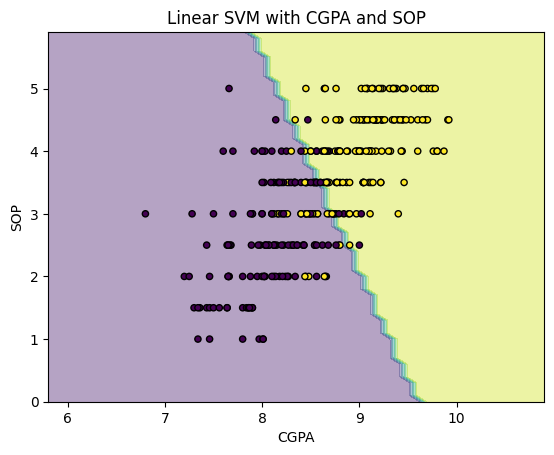

In [93]:
X_linear_cgpa_sop = train_data[['CGPA', 'SOP']]
y_linear_cgpa_sop = train_data['Label']
plot_decision_boundary(svm_linear, X_linear_cgpa_sop.values, y_linear_cgpa_sop.values, 'Linear SVM with CGPA and SOP', 'CGPA', 'SOP')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


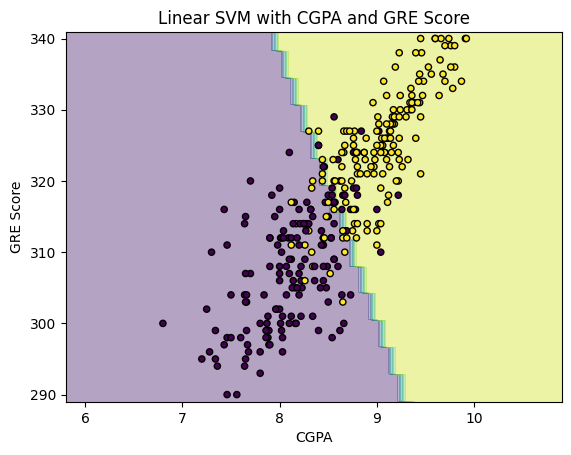

In [94]:
X_linear_cgpa_grescore = train_data[['CGPA', 'GRE Score']]
y_linear_cgpa_grescore = train_data['Label']
plot_decision_boundary(svm_linear_2, X_linear_cgpa_grescore.values, y_linear_cgpa_grescore.values, 'Linear SVM with CGPA and GRE Score', 'CGPA', 'GRE Score')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


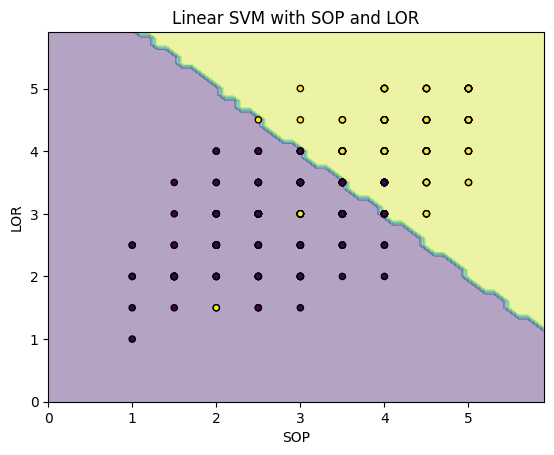

In [95]:
X_linear_sop_lor = train_data[['SOP', 'LOR ']]
y_linear_sop_lor = train_data['Label']
plot_decision_boundary(svm_linear_3, X_linear_sop_lor.values, y_linear_sop_lor.values, 'Linear SVM with SOP and LOR', 'SOP', 'LOR')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


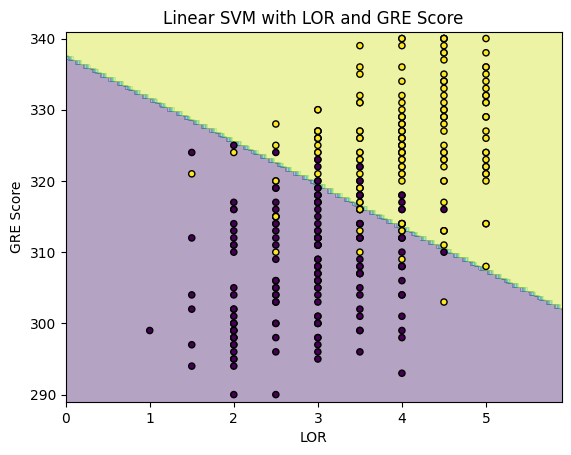

In [61]:
X_linear_lor_grescore = train_data[['LOR ', 'GRE Score']]
y_linear_lor_grescore = train_data['Label']
plot_decision_boundary(svm_linear_4, X_linear_lor_grescore.values, y_linear_lor_grescore.values, 'Linear SVM with LOR and GRE Score','LOR', 'GRE Score')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


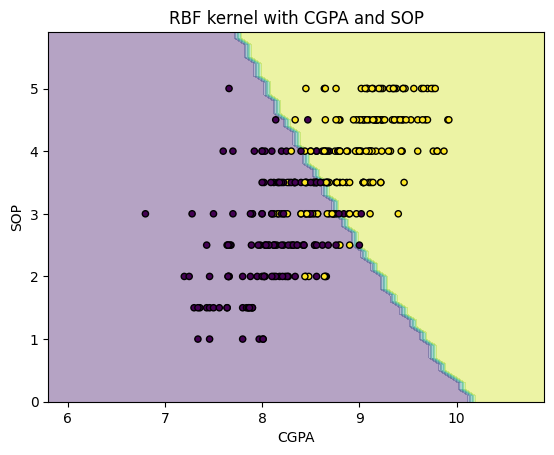

In [96]:
X_rbf_cgpa_sop = train_data[['CGPA', 'SOP']]
y_val_cgpa_sop = train_data['Label']
plot_decision_boundary(svm_rbf, X_rbf_cgpa_sop.values, y_val_cgpa_sop.values, 'RBF kernel with CGPA and SOP', 'CGPA', 'SOP')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


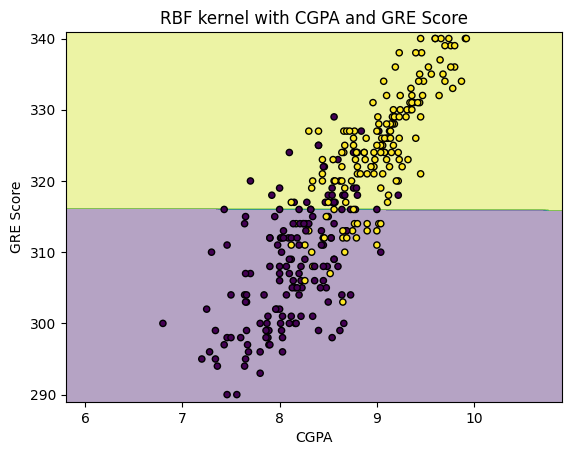

In [97]:
X_rbf_cgpa_grescore = train_data[['CGPA', 'GRE Score']]
y_rbf_cgpa_grescore = train_data['Label']
plot_decision_boundary(svm_rbf_2, X_rbf_cgpa_grescore.values, y_rbf_cgpa_grescore.values, 'RBF kernel with CGPA and GRE Score', 'CGPA', 'GRE Score')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


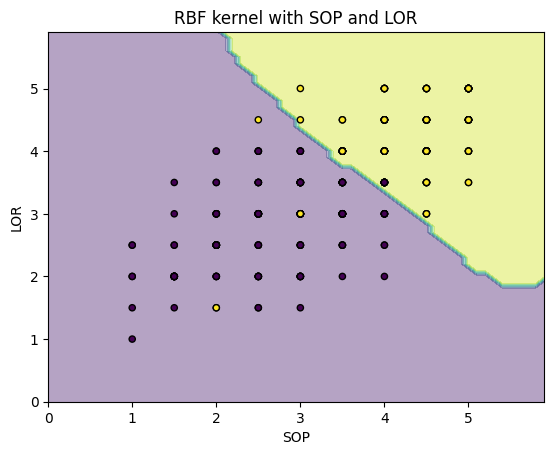

In [98]:
X_rbf_sop_lor = train_data[['SOP', 'LOR ']]
y_rbf_sop_lor = train_data['Label']
plot_decision_boundary(svm_rbf_3, X_rbf_sop_lor.values, y_rbf_sop_lor.values, 'RBF kernel with SOP and LOR', 'SOP', 'LOR')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


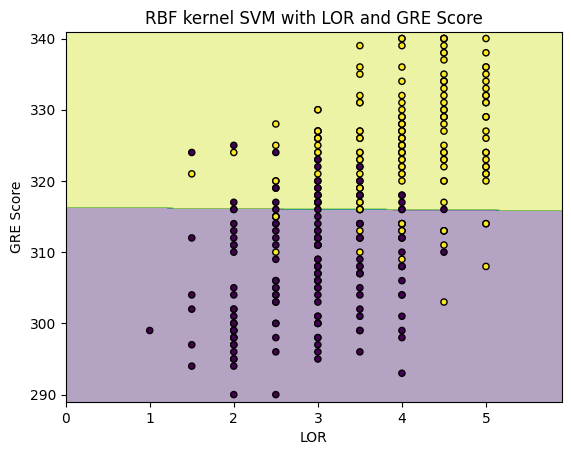

In [99]:
X_rbf_lor_grescore = train_data[['LOR ', 'GRE Score']]
y_rbf_lor_grescore = train_data['Label']
plot_decision_boundary(svm_rbf_4, X_rbf_lor_grescore.values, y_rbf_lor_grescore.values, 'RBF kernel SVM with LOR and GRE Score','LOR', 'GRE Score')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


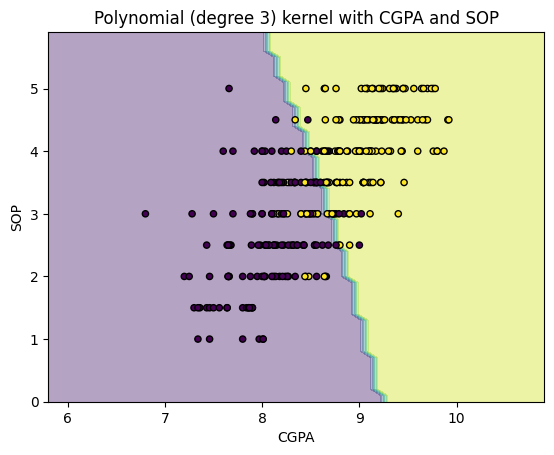

In [100]:
X_poly_cgpa_sop = train_data[['CGPA', 'SOP']]
y_poly_cgpa_sop = train_data['Label']
plot_decision_boundary(svm_poly, X_poly_cgpa_sop.values, y_poly_cgpa_sop.values, 'Polynomial (degree 3) kernel with CGPA and SOP', 'CGPA', 'SOP')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


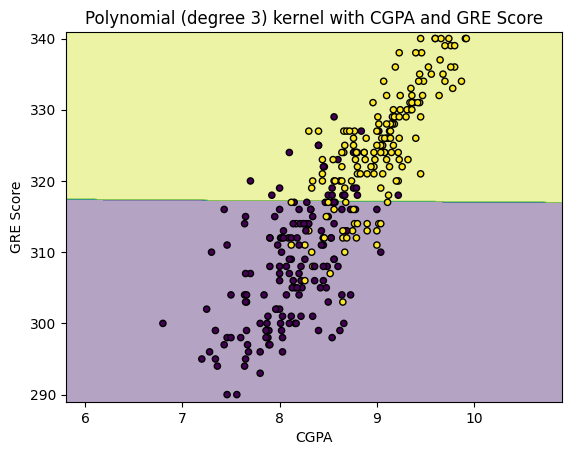

In [101]:
X_poly_cgpa_grescore = train_data[['CGPA', 'GRE Score']]
y_poly_cgpa_grescore = train_data['Label']
plot_decision_boundary(svm_poly_2, X_poly_cgpa_grescore.values, y_poly_cgpa_grescore.values, 'Polynomial (degree 3) kernel with CGPA and GRE Score', 'CGPA', 'GRE Score')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


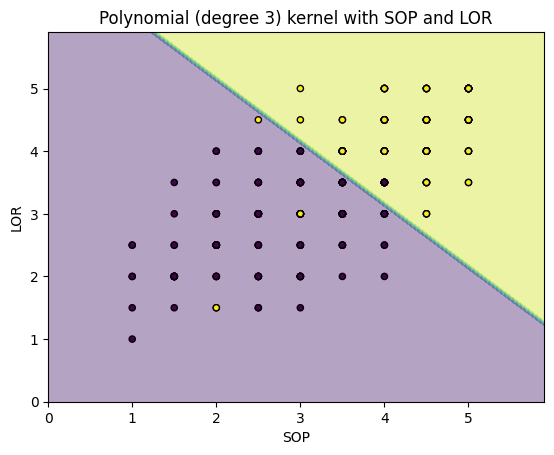

In [102]:
X_poly_sop_lor = train_data[['SOP', 'LOR ']]
y_poly_sop_lor = train_data['Label']
plot_decision_boundary(svm_poly_3, X_poly_sop_lor.values, y_poly_sop_lor.values, 'Polynomial (degree 3) kernel with SOP and LOR', 'SOP', 'LOR')

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


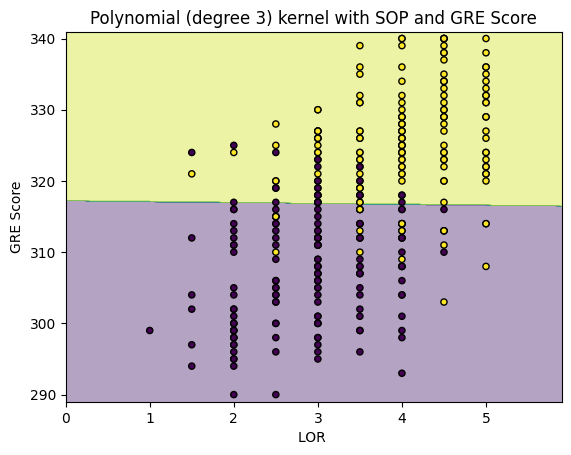

In [103]:
X_poly_lor_grescore = train_data[['LOR ', 'GRE Score']]
y_poly_lor_grescore= train_data['Label']
plot_decision_boundary(svm_poly_4, X_poly_lor_grescore.values, y_poly_lor_grescore.values, 'Polynomial (degree 3) kernel with SOP and GRE Score', 'LOR ', 'GRE Score')

### (f) Result Analysis

Which features + kernel combinations give you the best result?


Based on my observation from the figures depicted above, the combination which gives the best result is RBF kernel with feature set - (CGPA, SOP). This is because it looks like the decision boundary developed for it clearly separates both the classes and from my observation, there are just a few data points which are misclassified. 

In [104]:
X_val_1 = X_test[['CGPA', 'SOP']]
X_val_2 = X_test[['CGPA', 'GRE Score']]
X_val_3 = X_test[['SOP', 'LOR ']]
X_val_4 = X_test[['LOR ', 'GRE Score']]
y_val = y_test

using the validation data, the 20% which was kept aside from the training data to get the accuracy measure of the different models. 

In [105]:
y_val_1__linear_preds = svm_linear.predict(X_val_1)
accuracy_linear_cgpa_sop = accuracy_score(y_val, y_val_1__linear_preds)
print("Accuracy of linear SVM model with features CGPA and SOP: ", accuracy_linear_cgpa_sop)

y_val_2_linear_preds = svm_linear_2.predict(X_val_2)
accuracy_linear_cgpa_grescore = accuracy_score(y_val, y_val_2_linear_preds)
print("Accuracy of linear SVM model with features CGPA and SOP: ", accuracy_linear_cgpa_grescore)

y_val_3_linear_preds = svm_linear_3.predict(X_val_3)
accuracy_linear_sop_lor = accuracy_score(y_val, y_val_3_linear_preds)
print("Accuracy of linear SVM model with features SOP and LOR: ", accuracy_linear_sop_lor)

y_val_4_linear_preds = svm_linear_4.predict(X_val_4)
accuracy_linear_lor_grescore = accuracy_score(y_val, y_val_4_linear_preds)
print("Accuracy of linear SVM model with features LOR and GRE Score: ", accuracy_linear_lor_grescore)

Accuracy of linear SVM model with features CGPA and SOP:  0.78125
Accuracy of linear SVM model with features CGPA and SOP:  0.734375
Accuracy of linear SVM model with features SOP and LOR:  0.75
Accuracy of linear SVM model with features LOR and GRE Score:  0.765625


In [106]:
y_val_1_rbf_preds = svm_rbf.predict(X_val_1)
accuracy_rbf_cgpa_sop = accuracy_score(y_val, y_val_1_rbf_preds)
print("Accuracy of RBF model with features CGPA and SOP: ", accuracy_rbf_cgpa_sop)

y_val_2_rbf_preds = svm_rbf_2.predict(X_val_2)
accuracy_rbf_cgpa_grescore = accuracy_score(y_val, y_val_2_rbf_preds)
print("Accuracy of RBF SVM model with features CGPA and SOP: ", accuracy_rbf_cgpa_grescore)

y_val_3_rbf_preds = svm_rbf_3.predict(X_val_3)
accuracy_rbf_sop_lor = accuracy_score(y_val, y_val_3_rbf_preds)
print("Accuracy of RBF SVM model with features SOP and LOR: ", accuracy_rbf_sop_lor)

y_val_4_rbf_preds = svm_rbf_4.predict(X_val_4)
accuracy_rbf_lor_grescore = accuracy_score(y_val, y_val_4_rbf_preds)
print("Accuracy of RBF SVM model with features LOR and GRE Score: ", accuracy_rbf_lor_grescore)

Accuracy of RBF model with features CGPA and SOP:  0.8125
Accuracy of RBF SVM model with features CGPA and SOP:  0.796875
Accuracy of RBF SVM model with features SOP and LOR:  0.734375
Accuracy of RBF SVM model with features LOR and GRE Score:  0.78125


In [107]:
y_val_1_poly_preds = svm_poly.predict(X_val_1)
accuracy_poly_cgpa_sop = accuracy_score(y_val, y_val_1_poly_preds)
print("Accuracy of Polynomial (degree 3) model with features CGPA and SOP: ", accuracy_poly_cgpa_sop)

y_val_2_poly_preds = svm_poly_2.predict(X_val_2)
accuracy_poly_cgpa_grescore = accuracy_score(y_val, y_val_2_poly_preds)
print("Accuracy of Polynomial (degree 3) SVM model with features CGPA and SOP: ", accuracy_poly_cgpa_grescore)

y_val_3_poly_preds = svm_poly_3.predict(X_val_3)
accuracy_poly_sop_lor = accuracy_score(y_val, y_val_3_poly_preds)
print("Accuracy of Polynomial (degree 3) SVM model with features SOP and LOR: ", accuracy_poly_sop_lor)

y_val_4_poly_preds = svm_poly_4.predict(X_val_4)
accuracy_poly_lor_grescore = accuracy_score(y_val, y_val_4_poly_preds)
print("Accuracy of Polynomial (degree 3) SVM model with features LOR and GRE Score: ", accuracy_poly_lor_grescore)

Accuracy of Polynomial (degree 3) model with features CGPA and SOP:  0.765625
Accuracy of Polynomial (degree 3) SVM model with features CGPA and SOP:  0.796875
Accuracy of Polynomial (degree 3) SVM model with features SOP and LOR:  0.734375
Accuracy of Polynomial (degree 3) SVM model with features LOR and GRE Score:  0.796875


With respect to accuracy scores of the different models on the validation split, the best performing model with an accuracy of 0.8125 is 
RBF model with the feature combination of CGPA and SOP 

### (g) Inference

Below is the code to get the test_data from the test data file provided 

In [117]:
test_data = pd.read_csv('data_test-2.csv')
test_data = test_data.drop(test_data.columns[0], axis=1)
test_data.head()

test_data.columns
len(test_data)

80

Using the best model derived from the previous part based on accuracy measure and making prediction on the test data. 
This prediction is stored in a csv file 

In [118]:
X_test.head()

,CGPA,SOP
0,9.38,5.0
1,7.43,1.5
2,9.24,5.0
3,8.12,3.5
4,8.15,2.5


In [119]:
X_test = test_data[['CGPA', 'SOP']]
y_test = svm_rbf.predict(X_test)
df = pd.DataFrame({'pred_svm': y_test})
df.to_csv('Neha_Manghnani_preds.csv', index=False)
